# 2. Exploratory and Descriptive Statistics

In this notebook, the idea is to use descriptive and exploratory statistics to understand the relationship between the covariables and the target variable. In addition, I will use data visualization to show this relationship.

In [19]:
import os

import pandas as pd
import numpy as np

from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [21]:
df_train = pd.read_csv("Working_datasets/preprocessed_train.csv")
df_test = pd.read_csv("Working_datasets/preprocessed_test.csv")
y_variable = 'TARGET_FLAG'
df_train.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,EDUCATION,...,Manager,Professional,Student,Commercial,Minivan,Panel Truck,Pickup,Sports Car,Van,Highly Urban/ Urban
0,0.0,0,60.0,0,11.000000,11.117643,0,1.000000,0,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0,43.0,0,11.000000,11.423537,0,12.457811,0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0,35.0,1,10.000000,9.682779,0,11.729576,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0,51.0,0,14.000000,10.043458,0,12.632160,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0,50.0,0,10.499286,11.652566,0,12.404616,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Univariate Analysis

I start by testing the power of prediction of the covariables with regards with the target variable

In [22]:
Column_names = list(df_train.columns)
Column_names.remove(y_variable)
Numerical_Variables = ['AGE','YOJ','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CAR_AGE']
Other_variables = [ i for i in Column_names if not i in Numerical_Variables]

### Numerical Variables

I use the test the kolmogorov-Smirnof to see if there is a statistical relationship between the variable and the target variable. Null hypothesis is that variables are independent.

In [23]:
# AGE variable
AGE_pos = np.array(df_train[df_train.TARGET_FLAG == 1]['AGE'])
AGE_neg = np.array(df_train[df_train.TARGET_FLAG == 0]['AGE'])
ks_2samp(AGE_pos, AGE_neg)

KstestResult(statistic=0.12670781735206132, pvalue=3.3306690738754696e-16)

Null hypothesis is rejected and there is statistical relation between this covariable and the target variable

In [24]:
# YOJ variable
YOJ_pos = np.array(df_train[df_train.TARGET_FLAG == 1]['YOJ'])
YOJ_neg = np.array(df_train[df_train.TARGET_FLAG == 0]['YOJ'])
ks_2samp(YOJ_pos, YOJ_neg)

KstestResult(statistic=0.06507053917272712, pvalue=2.787685991156863e-06)

Null hypothesis is rejected and there is statistical relation between this covariable and the target variable

In [25]:
# INCOME variable
INCOME_pos = np.array(df_train[df_train.TARGET_FLAG == 1]['INCOME'])
INCOME_neg = np.array(df_train[df_train.TARGET_FLAG == 0]['INCOME'])
ks_2samp(INCOME_pos, INCOME_neg)

KstestResult(statistic=0.14915721598636406, pvalue=3.3306690738754696e-16)

Null hypothesis is rejected and there is statistical relation between this covariable and the target variable

In [26]:
# HOME_VAL variable
HOME_VAL_pos = np.array(df_train[df_train.TARGET_FLAG == 1]['HOME_VAL'])
HOME_VAL_neg = np.array(df_train[df_train.TARGET_FLAG == 0]['HOME_VAL'])
ks_2samp(HOME_VAL_pos, HOME_VAL_neg)

KstestResult(statistic=0.1668040692608029, pvalue=3.3306690738754696e-16)

Null hypothesis is rejected and there is statistical relation between this covariable and the target variable

In [27]:
# BLUEBOOK variable
BLUEBOOK_pos = np.array(df_train[df_train.TARGET_FLAG == 1]['BLUEBOOK'])
BLUEBOOK_neg = np.array(df_train[df_train.TARGET_FLAG == 0]['BLUEBOOK'])
ks_2samp(BLUEBOOK_pos, HOME_VAL_neg)

KstestResult(statistic=0.7008020889317418, pvalue=0.7073646060598775)

There is no enough evidence to reject the null hypothesis, this variable will be removed of our analysis to start reducing overfitting and augment parsimony.

In [28]:
# OLDCLAIM variable
OLDCLAIM_pos = np.array(df_train[df_train.TARGET_FLAG == 1]['OLDCLAIM'])
OLDCLAIM_neg = np.array(df_train[df_train.TARGET_FLAG == 0]['OLDCLAIM'])
ks_2samp(OLDCLAIM_pos, OLDCLAIM_neg)

KstestResult(statistic=0.2679941220963781, pvalue=3.3306690738754696e-16)

Null hypothesis is rejected and there is statistical relation between this covariable and the target variable

In [29]:
# CAR_AGE variable
CAR_AGE_pos = np.array(df_train[df_train.TARGET_FLAG == 1]['CAR_AGE'])
CAR_AGE_neg = np.array(df_train[df_train.TARGET_FLAG == 0]['CAR_AGE'])
ks_2samp(CAR_AGE_pos, CAR_AGE_neg)

KstestResult(statistic=0.10033533242253864, pvalue=2.7422508708241367e-14)

Null hypothesis is rejected and there is statistical relation between this covariable and the target variable

### The rest of Variables 

I use chi-square test to test the relationship between every covariable and the target variable. Null hypothesis is that the variables are independent.

In [30]:
def perform_chi2(DF_pandas,y_variable,x_variable):
    contigency = pd.crosstab(DF_pandas[y_variable],DF_pandas[x_variable], normalize='index')
    c, p, dof, expected = chi2_contingency(contigency)
    return(p)

In [31]:
eliminate_variables = []
for i in Other_variables:
    p_value = perform_chi2(df_train,y_variable,i)
    if p_value >0.05:
        eliminate_variables.append(i)
    

### Summary

I eliminate the variables that doesn't help the prediction of the target variable according to the non-parametric tests.

In [32]:
df_train = df_train.drop(['BLUEBOOK'], axis = 1)
df_train = df_train.drop(eliminate_variables, axis = 1)
df_test = df_test.drop(['BLUEBOOK'], axis = 1)
df_test = df_test.drop(eliminate_variables, axis = 1)
Numerical_Variables.remove('BLUEBOOK')
Other_variables = [ i for i in Other_variables if not i in eliminate_variables]
df_train.head()

,TARGET_FLAG,AGE,YOJ,INCOME,HOME_VAL,OLDCLAIM,CAR_AGE,Doctor,Home Maker,Lawyer,Manager,Professional,Student,Panel Truck,Sports Car,Van
0,0.0,60.0,11.000000,11.117643,1.000000,8.403128,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,43.0,11.000000,11.423537,12.457811,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,35.0,10.000000,9.682779,11.729576,10.563336,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,51.0,14.000000,10.043458,12.632160,1.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,50.0,10.499286,11.652566,12.404616,9.863551,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


At the end of the statistical tests, there are 15 covariables

# Multivariate Analysis

I propose multivariate data visualization to understand the relationship between covariables. As the non-numerical variables are all binary variables it is possible to perform a "big" correlation plot to understand the relationship between covariables

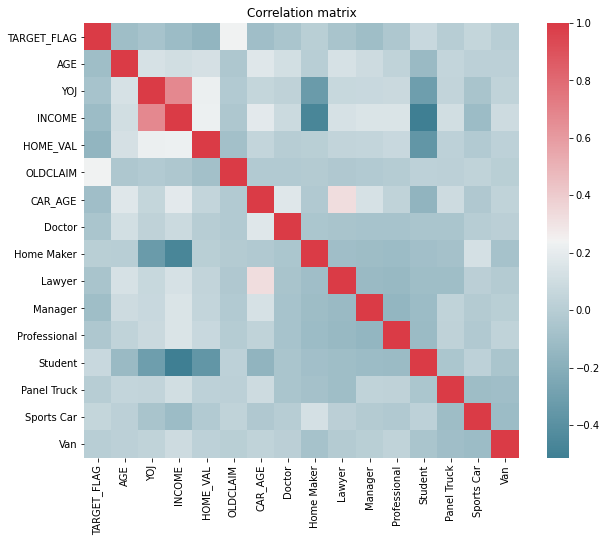

In [33]:
corr = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation matrix')
plt.show()

There is just a strong linear correlation between INCOME and YOJ. It could be possible to use a new variable that is a linear combination of these two variables but we might loose interpretability. I decide not to reduce more variables at the moment. 

**Insights** 

* There is a strong relationship between INCOME nad YOJ. I will perform PCA between these two variables and I will keep just the first component.
* It is quite weird that HOME_VAL and INCOME don't have a strong relationship but it is probably because of the population.
* There is negative relationship between Home Maker and INCOME which is understandable as this job does not have a high payment.
* There is also a strong negative relationship between student and INCOME which is coherent with reality.

### PCA
I perform PCA analysis to reduce the dimensionality and avoid multicolinearity in the model. 

In [34]:
pca = PCA(n_components=1)
pca.fit(df_train[['YOJ','INCOME']])
pca.explained_variance_ratio_

array([0.86328689])

The first factor captures 86% of the variance of the analyzed variables.

In [35]:
pca_factor = pca.transform(df_train[['YOJ','INCOME']])
pca_factor = pd.DataFrame(pca_factor,columns =['PCA_FACTOR'])
df_train = pd.concat([df_train, pca_factor], axis=1)
df_train = df_train.drop(['YOJ','INCOME'], axis=1)

pca_factor = pca.transform(df_test[['YOJ','INCOME']])
pca_factor = pd.DataFrame(pca_factor,columns =['PCA_FACTOR'])
df_test = pd.concat([df_test, pca_factor], axis=1)
df_test = df_test.drop(['YOJ','INCOME'], axis=1)

df_train.head(10)

,TARGET_FLAG,AGE,HOME_VAL,OLDCLAIM,CAR_AGE,Doctor,Home Maker,Lawyer,Manager,Professional,Student,Panel Truck,Sports Car,Van,PCA_FACTOR
0,0.0,60.0,1.000000,8.403128,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.972189
1,0.0,43.0,12.457811,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.125707
2,0.0,35.0,11.729576,10.563336,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.612868
3,0.0,51.0,12.632160,1.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.027922
4,0.0,50.0,12.404616,9.863551,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.807560
5,1.0,34.0,1.000000,1.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.148708
6,0.0,54.0,8.869825,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102503
7,1.0,37.0,12.717938,7.772332,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.775922
8,1.0,34.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.073568
9,0.0,50.0,1.000000,1.000000,17.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.255478


## Summary
In this notebook, I identify the prediction power of the covariables with respect to the target variable using non-parametric statistics; then I use data visualization to understand the relationships within covariables and I perform PCA where needed. As a main result of the notebook, I reduced the number of covariables from 33 to 14. 

In [36]:
new_dir = 'Working_datasets'

if not os.path.exists(new_dir):
    os.mkdir(new_dir)
    
df_train.to_csv(os.path.join(new_dir, 'processed_train.csv'), index=None)
df_test.to_csv(os.path.join(new_dir, 'processed_test.csv'), index=None)